<a href="https://colab.research.google.com/github/kkaisar/introtoML/blob/main/task1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Шаг 1: Загрузка и предобработка датасета MNIST
X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')
X = X.astype(float).values / 255  # Нормализуем значения пикселей в диапазоне [0, 1]
Y = Y.astype(int).values

# Разделяем датасет на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Проверим размеры выборок
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")


Обучающая выборка: (56000, 784), Тестовая выборка: (14000, 784)


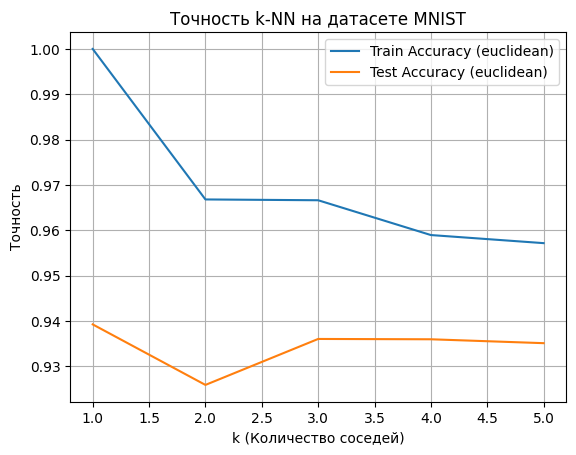

In [3]:
# Импортируем необходимые библиотеки для k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Уменьшаем выборку для обучения
X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, train_size=0.1, random_state=42)

# Шаг 2: Обучение моделей k-NN с меньшим диапазоном k и одной метрикой расстояния
k_values = range(1, 6)
distance_metrics = ['euclidean']
results = {}

for metric in distance_metrics:
    accuracies_train = []
    accuracies_test = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_small, Y_train_small)

        # Предсказания на обучающей и тестовой выборках
        Y_train_pred = knn.predict(X_train_small)
        Y_test_pred = knn.predict(X_test)

        # Рассчитываем точность
        acc_train = accuracy_score(Y_train_small, Y_train_pred)
        acc_test = accuracy_score(Y_test, Y_test_pred)

        accuracies_train.append(acc_train)
        accuracies_test.append(acc_test)

        # Сохраняем результаты
        results[(k, metric)] = (acc_train, acc_test)

    # Плотируем точности для текущей метрики расстояния
    plt.plot(k_values, accuracies_train, label=f'Train Accuracy ({metric})')
    plt.plot(k_values, accuracies_test, label=f'Test Accuracy ({metric})')

plt.xlabel('k (Количество соседей)')
plt.ylabel('Точность')
plt.title('Точность k-NN на датасете MNIST')
plt.legend()
plt.grid()
plt.show()


Лучшая модель: k=1, Метрика=euclidean, Тестовая точность=0.9392


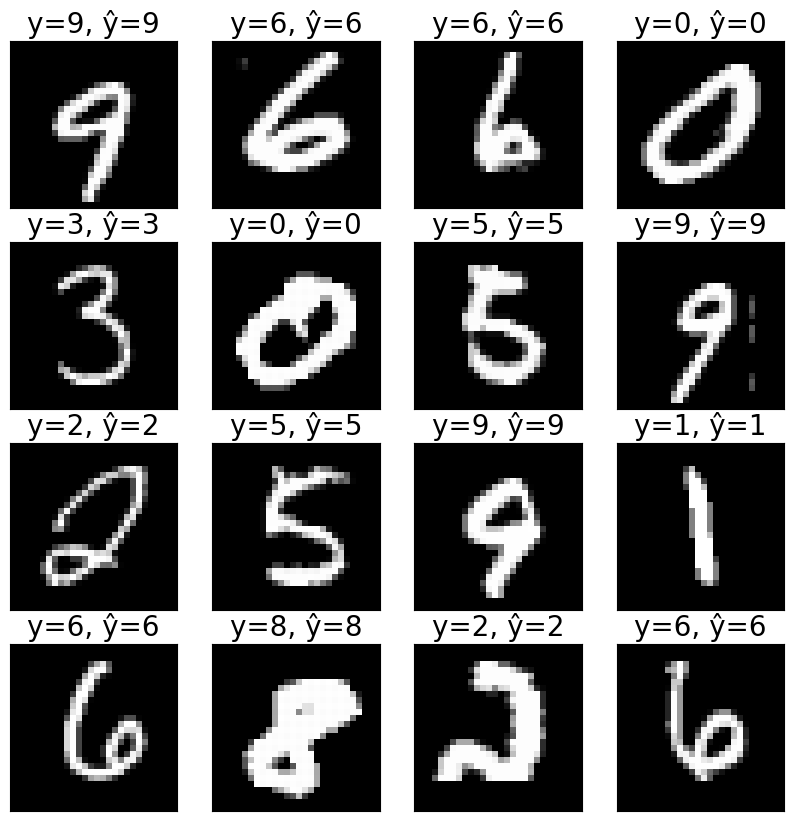

In [4]:
# Визуализация тестовых образцов и их предсказаний
best_k = None
best_metric = None
best_accuracy = 0
best_predictions = None

for (k, metric), (train_acc, test_acc) in results.items():
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_k = k
        best_metric = metric
        best_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        best_model.fit(X_train, Y_train)
        best_predictions = best_model.predict(X_test)

print(f'Лучшая модель: k={best_k}, Метрика={best_metric}, Тестовая точность={best_accuracy:.4f}')

# Визуализация предсказаний
def plot_digits(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        if y_pred is None:
            title = str(y_true[indices[i]])
        else:
            title = f"y={y_true[indices[i]]}, ŷ={y_pred[indices[i]]}"
        plt.title(title, size=20)
    plt.show()

# Визуализируем тестовые образцы с предсказаниями
plot_digits(X_test, Y_test, best_predictions)
